## PA3606 UNIT 2: Climate Physics
# Computer Workshop 1: The Greenhouse Effect

#### Purpose of these workshops
For Unit 2 of PA3606 we will have 2 computer workshops which you should think of as guided lectures. There will be no expectation for you to write lots of code, rather the objectives are to:
1. Introduce you to the Jupyter environment
2. learn how to put together basic workflow to analyse data
3. Gain experience working with blocks of python code
4. Use knowledge from our lectures to interpret results 

#### Python Libraries
For this computer workshsop we will work with only 2 python libraries:
1. **NumPy** (https://numpy.org/): _"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"_. We will use this for most of our math functions
2. **Matplotlib** (https://matplotlib.org/): _"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible"_. We will use this library to visualise the contents of data files and the results from the analyses we perform on these data.


***
### Todays aims and objectives
Over the next hour we are going to explore fundemental of climate balance concept we met in Lecture 1:
#### $energy\ in = energy\ out$

We are going to look at how this balance controls temeprature using simple models, and investigate how anthroprogenic emissions impacts the balance and relate this back to climate change. 

lets begin with looking at a simple model of the Earth Climate System:


![simple 0D model schematic](img/zero_dim_ebm_visual.png)

This is our conceptual model for estimating planetary average temperature. We can use the models we will look at today for any planet, though today we will soley focus on Earth or Earth-like planets. Lets begin by defining the terms and assumptions in our model. 

![bread down of ASR](img/zero_dim_ebm_visual_maths.png)

From this we can define the our fist term for the for the Arriving Short Wave Radiation (**ASR**):
### $ASR = \pi R_{E}^{2} S(1- \alpha)$ 

Where $R_{E}$ is the radius of the Earth, $S$ is the solar constant (see lecture 2), and $\alpha$ is the average albedo for Earth.

![albedo explanation](img/albedo_explanation.png)

![outgoing longwave radiation assumptions](img/zero_dim_ebm_visual_maths_step2.png)

Next we can write a term for the Outgoing Longwave Radiation (**OLR**):
### $OLR = 4\pi R_{E}^{2}\sigma T_{eq}^{4}$

Where $R_{E}$ is the radius of the Earth, $\sigma$ is the Stephan-Boltzmann constant, and $T_{eq}$ is the equalibrium temperature (the blackbody temperature expected from solar heating alone) for the Earth. Using these definitions for ASR and OLR we can derive an expression for the planetary equalibrium temperature. This is our first model and this is known as the zero dimensional energy balance model: 

![derive 0d ebm](img/zero_dim_ebm_derive.png)

### Python version of the Zero Dimensional Energy Balance Model

In [80]:
# lets start by loading the python librarues we will need for this session
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def zero_dimensional_ebm(S,alpha):
    """ our first climate model, the zero dimensional energy balance model.
    inputs:  S     -> solar constant (W/m^2)
             alpha -> albedo (unitless)
             
    outputs: Teq  -> planetary equalibrium temperaturein (K)
    """
    # define constants
    sigma = 5.67e-8 # W m-2 k-4 Stefan-Boltzmann
    
    # calculate and return equalibrium temperature
    return ((S*(1-alpha))/(4*sigma))**0.25 

Lets try out our model to see how it performs. First lets make some assumptions:
1. the average albedo for Earth is 0.3
2. the solar constant is 1361 W/m$^{2}$

In [82]:
# claculate the equalibrium temperature usin
Teq = zero_dimensional_ebm(1361,0.3)

Now we will pront out the result. When we want to print text out to sceen or a file, the format of the variable we are printing is known as a string. In Python we do this using the print command with the string variable placed between qutation marks inside parentheses:

```python
print("hello world")
```
Now the result from our model output is a number, if we want to place this inside a string we can use a method known as 'f-string'. This allows to palce the number in to the string and format it with minimal code. For an f-string an 'f' is placed before the quotation marks and the variable you want to insert is placed between braces {}. To format the variable placed in the braces you ad a colon (:) and add the formatting syntax to the right of the colon. In our example below we '0.2f', this tells the interpreter that our variables is a float and that we want to round it to 2 decimal places:   

In [83]:
# lets print out the result
print(f"The equalibrium temperature of the planet is {Teq:0.2f} K")

The equalibrium temperature of the planet is 254.58 K


#### does this seem correct?

If we convert our answer to Celcius we get an answer for the global average equalibrium temperature of -18.6$^{\circ}$C. This is clearly too cold so whats wrong with our model? Our primary assumption is that the Earth is behaving as a perfect blackbody. In reality this is not true, and we actually need to consider another variable known as the emissivity. Emissivity is defined as the ratio of the energy radiated from a material's surface to that radiated from a perfect emitter (i.e. a blackbody), at the same temperature and wavelength and under the same viewing conditions. It is a dimensionless number between 0 (for a perfect reflector) and 1 (for a perfect emitter). Below is an example of global emissivity maps as a function of season, for (a) winter, (b) spring, (c) summer, and (d) autumn calculated from NCEP reanalysis (credit Figure 1 from Morales-Salinas et al., (2023)). 


![emissvity example](img/emissivity_maps.png)

So how do we include emissivity? Becuase emissivity describes the effectiveness of a blackbody radiator we add it to the term for terrestial output term:

![zero dim ebm with emissivity](img/zero_dim_ebm_visual_maths_step3.png)

So we now include a term that adjusts the OLR based how efficient balckbody we assume the Earth to be. Lets update our previous model to take this into account and see what the implications are:

In [6]:
def zero_dimensional_ebm_v2(S,alpha, emiss):
    """ The updated version of our zero dimensional energy balance model.
    inputs:  S     -> solar constant (W/m^2)
             alpha -> albedo (unitless)
             emiss -> emissivity (unitless) [*new term]
             
    outputs: Teq  -> planetary equalibirum temperaturein (K)
    """
    # define constants
    sigma = 5.67e-8 # W m-2 k-4 Stefan-Boltzmann
    
    # calculate and return equalibrium temperature
    return ((S*(1-alpha))/(4*emiss*sigma))**0.25 

For our purposes we will assume an emissivity for earth of 0.57, now we can rerun the previous calculation with our updated model:

In [84]:
# claculate the equalibrium temperature using our updated model
Teff = zero_dimensional_ebm_v2(1361,0.3,0.57)

# lets print out the result
print(f"The equalibrium temperature of the planet is {Teff:0.2f} K")

The equalibrium temperature of the planet is 292.99 K


This answer looks better, now our global average equalibrium temperature of 19.8$^{\circ}$C. **Recap:** The equilibrium temperature is the (theoretical) blackbody temperature at which emitted (long wave) radiation equals absorbed solar (shortwave) radiation emitted by is parent star. Assumptions from our model: 
1. Both the albedo $\alpha$ & emissivity $\epsilon$ are spatially & temporally uniform,
2. $\alpha$ & $\epsilon$ are not functions of $\lambda$, and
3. the planet has no atmosphere.

#### Effective planetary temperature
Planets may have internal heat sources or experience tidal heating. The effective temperature of a planet is the (blackbody) temperature corresponding to the long-wave radiation which it emits. Therefore, if a planet is only heated by via solar radiation from its parent star then:

### $T_{eff} = T_{eq}$

Differences between $T_{eff}$ and $T_{eq}$ can thus provide information on a planet’s characteristics
- Earth $T_{eff} = T_{eq}$
- Jupiter $T_{eff} \neq T_{eq}$

#### Radiative criteria for a habitable planet
Consider any given planet with albedo $\alpha$ and emissivity $\epsilon$, that is at a distance $R$ from a star of radius $R_{star}$ and temperature $T_{star}$:
- Condition for liquid water 273 K < $T_{eff}$ < 373 K
- Minimum inner orbital radius: $T_{eff}$ < 373 K; planet not tidally locked

### $R_{min} = \sqrt[4]{\frac{S(1-\alpha)}{4\epsilon \sigma}} = \sqrt[4]{\frac{(\sigma T^{2}_{star})(4\pi R^{2}_{star})}{4\pi R^{2}}\frac{(1-\alpha)}{4\epsilon \sigma}}$

![habitable planet](img/radiative_criteria_habitable_planet.png)

***
## Updating our model to consider an atmosphere

![single layer ebm](img/one_layer_ebm_example.png)

You can now see that we have two temperatures, the surface temperature ($T_{s}$), and the atmospheric slab temperature ($T_{A}$). We can now write the balance equations and solve for both temperatures:

![single layer ebm](img/one_layer_ebm_example_step2.png)

### Implications
- $T_{A}$ is now the effective temperature of the Earth system
- It is exactly the same as $T_{eff}$ in the absence of an atmosphere
- The presence of a greenhouse gas (GHG) in atmosphere makes the Earth’s surface warmer but does not modify the total outgoing LW emissions back to space
- Outgoing LW radiation emissions only depend on $S$ and $\alpha$
- $T_{s}$ > $T_{A}$ is always true (perfect balckbody case, i.e. $\epsilon_{s} = \epsilon_{A} = 1$)


Now we can revise our model to account for the atmospheric slab layer

In [8]:
def zero_dimensional_ebm_one_layer_atm(S,alpha, es, ea):
    """ The updated version of our zero dimensional energy balance model.
    inputs:  S     -> solar constant (W/m^2)
             alpha -> albedo (unitless)
             es    -> surface emissivity (unitless)
             ea    -> atmosphere emisivity (unitless)
             
    outputs: Ta  -> planetary atmospheric temperature (K)
             Ts  -> planetary surface temperature (K)
    """
    # define constants
    sigma = 5.67e-8 # W m-2 k-4 Stefan-Boltzmann
    
    # calculate atmospheric temperature
    Ta = ((S*(1-alpha))/(4*sigma*ea))**0.25

    # calculate surface temperature
    Ts = Ta*(2*(ea/es))**0.25

    # return results
    return Ta, Ts

lets calculate the two temperatures based off our assumptions

In [9]:
# assumptions
ea = 1
es = 1
S = 1361 # W/m^2
alpha = 0.3

# calculate Ta and Ts
Ta, Ts = zero_dimensional_ebm_one_layer_atm(S,alpha, es, ea)

# print results
print(f"Atmospheric temperature = {Ta:0.2f} K")
print(f"Surface temperature = {Ts:0.2f} K")


Atmospheric temperature = 254.58 K
Surface temperature = 302.75 K


We can now investigate the whether the surface temperature is always warmer than the atmopshere when albedo and the solar constant vary. The one layer atmosphere model can be placed in a loop where we iterate over a variety of albedo and solar constant values. First we will define the range of values for these variables:

In [85]:
albedos = np.arange(100)*0.01+0.01
Svals = np.arange(81)-40+1361

Next we define an array using numpy to hold our results of our temperature differences ($T_{s} - T_{A}$). We will use the the ``np.full``  method, where provide a tuple containing the dimensions and a default value to fill it with. We will use ``np.nan`` or not a number (NaN):

In [87]:
# our array is 2D (number of albedo points x number of solar points), we call dT as it will hold temperature differences
dT = np.full((100,81),np.nan)

Finally we loop over each dimension and calculate the temperature difference using our one layer atmosphere model

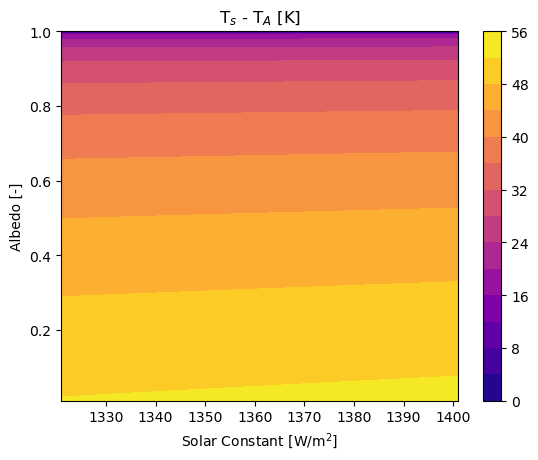

In [88]:
# in this loop we get a counter ii (integer 0-79, and the corresponding S value)
for ii, S in enumerate(Svals):
    # in this loop we get a counter jj (integer 0-99, and the corresponding albedo value)
    for jj, alpha in enumerate(albedos):
        # calculate Ts and Ta, ea and es are bsame as before (ea=es=1) 
        Ta, Ts = zero_dimensional_ebm_one_layer_atm(S,alpha, es, ea)
        # add temperature difference to results array
        dT[jj,ii] = Ts-Ta 

# lets make a simple plot to visualise the result
plt.contourf(Svals, albedos, dT, 14,cmap='plasma')
plt.ylabel("Albedo [-]")
plt.xlabel("Solar Constant [W/m$^{2}$]")
plt.title(r"T$_{s}$ - T$_{A}$ [K]")
plt.colorbar()

***
## Updating our model to consider an atmosphere with two layers

![two atm layer ebm](img/two_layer_ebm_example.png)

You can now see that we have two temperatures, the surface temperature ($T_{s}$), and the atmospheric slab temperatures for layers 1 and 2 ($T_{A1}, T_{A2}$ respectively). We can now write the balance equations and solve for both temperatures:

![two atm layer step 2](img/two_layer_ebm_example_step2.png)

### Implications
- $T_{A1}$ is now the effective temperature of the Earth system
- It is exactly the same as $T_{eff}$ in the absence of an atmosphere
- The presence of an additional GHG layer in atmosphere makes the Earth’s surface warmer but does not modify the total outgoing LW emissions back to space
- $T_{s}$ > $T_{A1}$ > $T_{A2}$ is always true $\rightarrow$ temperature decreases with height (perfect balckbody case, i.e. $\epsilon_{s} = \epsilon_{A1} = \epsilon_{A2} = 1$)


Now we can revise our model to account for both the atmospheric slab layers

In [11]:
def zero_dimensional_ebm_two_layer_atm(S,alpha, es, ea1, ea2):
    """ The updated version of our zero dimensional energy balance model.
    inputs:  S     -> solar constant (W/m^2)
             alpha -> albedo (unitless)
             es    -> surface emissivity (unitless)
             ea1    -> atmosphere layer 1 emisivity (unitless)
             ea2    -> atmosphere layer 1 emisivity (unitless)
             
    outputs: Ta1  -> planetary atmospheric layer one temperature (K)
             Ta2  -> planetary atmospheric layer two temperature (K)
             Ts  -> planetary surface temperature (K)
    """
    # define constants
    sigma = 5.67e-8 # W m-2 k-4 Stefan-Boltzmann
    
    # calculate atmospheric layer 2 temperature
    Ta2 = ((S*(1-alpha))/(4*sigma*ea2))**0.25

    # calculate atmospheric layer 1 temperature
    Ta1 = Ta2*(2*(ea2/ea1))**0.25

    # calculate surface temperature
    Ts = Ta2*(3*(ea2/es))**0.25

    # return results
    return Ta1, Ta2, Ts

Now we can calculate the three temperatures usinbg the updated model:

In [12]:
# assumptions
ea1 = 1
ea2 = 1
es = 1
S = 1361 # W/m^2
alpha = 0.3

# calculate Ta1, Ta2, and Ts
Ta1, Ta2, Ts = zero_dimensional_ebm_two_layer_atm(S,alpha, es, ea1, ea2)

# print results
print(f"Atmospheric layer 2 temperature = {Ta2:0.2f} K")
print(f"Atmospheric layer 1 temperature = {Ta1:0.2f} K")
print(f"Surface temperature = {Ts:0.2f} K")

Atmospheric layer 2 temperature = 254.58 K
Atmospheric layer 1 temperature = 302.75 K
Surface temperature = 335.05 K


We can see that the temperature is warmest in the surface layer and coldest for the 2$^{nd}$ atmospheric slab layer, as expected. However, does $T_{A2}$ look familar? we know that in this model the 2nd atmospheric slab temperature is equivilent to the effective planetary temperature and is the same result we saw from our first model. Therefore, the we can see from our model experiments an example of how greenhouse gaes impact planetary temperatures, e.g. warming the surface.

***
Next we look at a different way of represnting greenhouse gases in the atmosphere by looking at another concept, the N-layer model. 

![many layer ebm](img/many_layer_ebm_example.png)

### What does n represent?

# Experiment: The Time Dependent Zero Dimensional N-Layer Energy Balance Model
Starting from our original model of Arriving Shrotwave radiation ($ASR$) and Outgoing Longwave Radiation ($OLR$):
## $ASR = OLR$

### Defining our functions for ASR and OLR
We need to first redefine the our expression for the Outgoing Longwave Radiation based on the earlier equuation for the N-layer  model. Our previous definition is:
### $OLR = \epsilon \sigma T^{4}$
To include ou 'n' term we update our defintion like this:
### $OLR = \frac{\epsilon \sigma T^{4}}{(n+1)}$
What you notice is that the $(n+1)$ term essentially scales the OLR, which will have the effect of modulating the temperature similar to how greenhouse gases work. For ASR we use the solar insolation ($Q$) inplace of the solar constant ($S$), where $Q=\frac{S}{4}$. So the ASR becomes:
### $ASR = Q(1-\alpha)$
Lets look at these equations for ASR and OLR coded up in Python:

In [91]:
# define a function for outgoing longwave radiation (OLR)
def OLR(Ts, emiss, NL):
    """ Calculate Outgoing Longwave Radiation (OLR)
    inputs: Ts    -> surface temperature (K)
            emiss -> emissivity (unitless)
            NL    -> number of layers (unitless)

    outputs: OLR -> outgoing longwave radiation (W/m^2)
    """
    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4
    return (emiss * sigma * (Ts**4))/(NL+1)

# define a function for absorbed shortwave radiation (ASR), here you can see we now use the
# solar insolation (Q) in place of the solar constant (S). essentially:
# Q = S/4
def ASR(Q, alpha):
    """ Calculate Arriving Shortwave Radiation (ASR)
    inputs: Q     -> solar insolation (W/m^2) => S/4 
            alpha -> albedo (unitless)
    
    outputs: ASR  -> arriving shortwave radiation (W/m^2)
    """
    return (1 - alpha) * Q

The simplest model we can make for energy balance assumes the rate of temperature change is proportional to the imposed energy imbalance:
## $C\frac{dT}{dt} = ASR - OLR$
Where $C$ is the heat capacity in the system, $\frac{dT}{dt}$ is the rate of change in the temperature. In oder to solve this using Python, we can replace the differentials in our model with the **finite differences** thus:
## $C\frac{\Delta T}{\Delta t} \approx ASR - OLR$
where $\Delta T = T_{n+1} - T_{n}$ and $\Delta t = t_{n+1} - t_{n}.$
### Assumptions:
- We are always dealing with discrete quantites.
- we can approximate the derivative $\frac{\Delta T}{\Delta t}$ such that the time step $\Delta t$ is valid and useful.

## Time stepping within the model
Now we take the next step to establish how we can calculate future temperatures. Our starting point is our current definition of the model:
## $C\frac{T_{n+1} - T_{n}}{\Delta t} = ASR - OLR$
The approach we are taking to define the time and temperature interval changes is known as **discretization**. This allows us to rearrange and solve for the **future** temperature:
## $T_{n+1} = T_{n} + \frac{\Delta t}{C}(ASR - OLR(T_{n}))$
where $\Delta t$ is known as the **timestep** and OLR uses the current temperature to calculate the future temperature. Here we are applying the **Forward Euler method** to solve for $T_{n+1}$. You will notice we have not reffered to the effective temperature here as we did with our non-time dependent version. We now will think of the temperature as the surface temperature. In our new model if $T_{n} < T_{eff}$ then the system should warm and if $T_{n} > T_{eff}$ then the system should cool. With that in mind lets begin constructuing our model.

In [92]:
# create a function to find the new temperature based on the previous using Euler's method
def step_forward(S, Ts, alpha, emiss, dt, NL):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: S     -> solar constant (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)
            NL    -> number of layers

    outputs: Ts   -> new surface temperaturein time step
    """
    c_w = 4E3  #  Specific heat of water in J/kg/K
    rho_w = 1E3  #  Density of water in kg/m3
    H = 100.   #  Depth of water in m
    C = c_w * rho_w * H   #  Heat capacity of the model

    
    return Ts + dt / C * ( ASR(S, alpha) - OLR(Ts, emiss, NL) )

## Running experiments with our new model
Next we need a piece of code that will run experiments that we design. This is done using a python function which takes in some input variables and returns

In [93]:
# run ebm experiment
def run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0, NL):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: Q     -> solar insolation (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)
            NL    -> number of layers

    outputs: Years  -> array holding experiment year number
             Tsteps -> array holding Ts for each time step (K)
    """
    
    # initialise arrays to hold results
    Tsteps = np.zeros(numsteps+1)
    Years = np.zeros(numsteps+1)
    # set the first value to be the temperature in balance using Zero Dim EBM
    # i.e. ASR = OLR, therfore Ts = (Q*(1-alpha)/(emiss*sigma))**0.25
    Tsteps[0] = T0

    # loop over each year and calculate new surface temperature
    for n in range(numsteps):
        Years[n+1] = n+1
        Tsteps[n+1] = step_forward(Q, Tsteps[n], alpha, emiss ,dt,NL[n+1])

    return Years, Tsteps

#### Define some initail asumptions that will be applied to all experiemnts

In [94]:
# define the time interval, currently one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0 # seconds in 1 year

# define albedo 
alpha = 0.3

# define emissivity
emiss = 1.0

# define solar insolation
S = 1361.0 # W/m^2
Q = S/4

# define number steps (e.g. number of years), total number of years = num steps + 1
numsteps = 49

First two experiments we will run two 50 year simulations where we will supply different values for 'n' to represent the amount of greenhouse gases in the atmosphere and look at the results

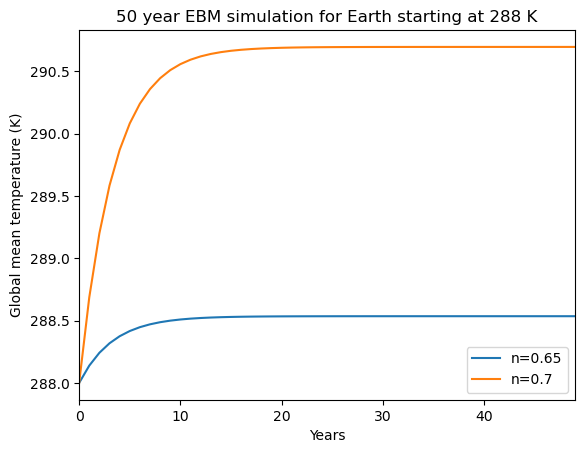

In [97]:
# dfine a starting temperature
T0 = 288 # K

########################
# EXP 1
# define N layers
NL = np.full(numsteps+1,0.65)

# run the experiment
Years, Texp1 = run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0,NL)

########################
# EXP 2
# define N layers
NL = np.full(numsteps+1,0.7)

# run the experiment
Years, Texp2 = run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0,NL)

# make a simple plot the results
plt.plot(Years, Texp1, label="n=0.65")
plt.plot(Years, Texp2, label="n=0.7")

plt.xlim(0,numsteps)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title(f"{numsteps+1} year EBM simulation for Earth starting at {T0} K")
plt.legend(loc='best')

### What can we infer from this plot?
***
For our next experiments we look at two sceanrios where the n value increase over the 50 year period (proxy rising GHG concentrations) and the second where the n value reduces linearly (proxy for falling GHG concentrations).  

Text(0.5, 1.0, '50 year EBM simulation for Earth starting at 288 K')

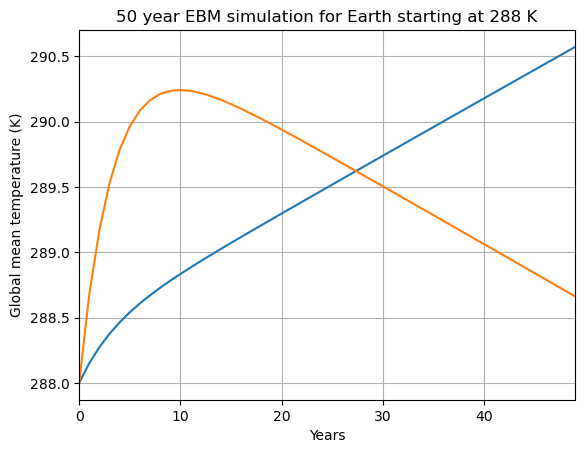

In [77]:
########################
# EXP 3
# define N layers
NL = np.linspace(0.65, 0.7, numsteps+1)

# run the experiment
Years, Texp3 = run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0,NL)

########################
# EXP 4
# define N layers
NL = np.linspace(0.7, 0.65, numsteps+1)
# run the experiment
Years, Texp4 = run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0,NL)

# make a simple plot the results
plt.plot(Years, Texp3)
plt.plot(Years, Texp4)
plt.xlim(0,numsteps)
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title(f"{numsteps+1} year EBM simulation for Earth starting at {T0} K")

### What can we infer from this plot? And how does it differ from the previous one?

***

![summary of session](img/lect3_cw1_summary.png)